In [2]:
import cv2
import matplotlib.pyplot as plt

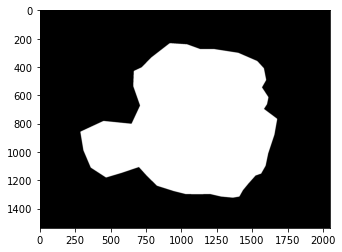

In [67]:

thresh=cv2.imread('Image/ISIC_0000150_segmentation.png')
plt.imshow(thresh)

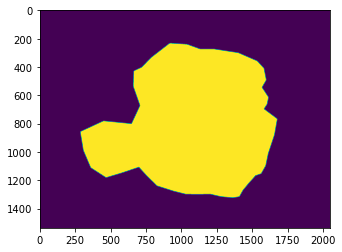

In [12]:
img_gray = cv2.cvtColor(thresh, cv2.COLOR_RGB2GRAY)
_,thres=cv2.threshold(img_gray,254,255,cv2.THRESH_BINARY)
plt.imshow(thres)

In [17]:
# Find the contour of the figure 
contours, hierarchy = cv2.findContours(
                                   image = thres, 
                                   mode = cv2.RETR_TREE, 
                                   method = cv2.CHAIN_APPROX_SIMPLE)
# Draw the contour 
img_copy = img.copy()
final = cv2.drawContours(img_copy, contours, contourIdx = -1, 
                         color = (0,255,0), thickness = 10)

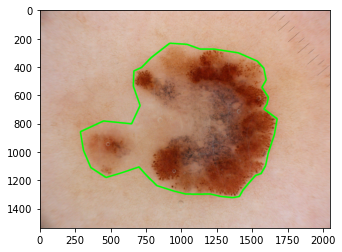

In [18]:
plt.imshow(final)

In [26]:
c_0=contours[0]

285
234
1390
1088


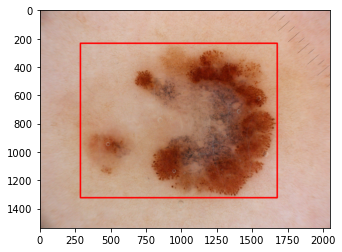

In [31]:
# The first order of the contours
c_0 = contours[0]
# Get the 4 points of the bounding rectangle
x, y, w, h = cv2.boundingRect(c_0)
# Draw a straight rectangle with the points
img_copy = img.copy()
img_box = cv2.rectangle(img_copy, (x, y), (x+w, y+h), color = (255, 0, 0), thickness =10)
print(x)
print(y)
print(w)
print(h)
plt.imshow(img_box)

In [32]:
print(img.shape)
print(thresh.shape)

(1536, 2048, 3)
(1536, 2048, 3)


In [34]:
height=img.shape[0]
width=img.shape[1]
x_center=x+width/2
y_center=y+height/2
x_center/=width
y_center/=height
w/=width
h/=height


In [35]:
print(x_center)
print(y_center)
print(w)
print(h)

#for yolo input

0.63916015625
0.65234375
0.6787109375
0.7083333333333334


In [36]:
!pip install labelimg

  Running setup.py install for labelimg: started
    Running setup.py install for labelimg: finished with status 'done'


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [58]:
import pandas as pd
df = pd.DataFrame([[1],[12,123,1231]])
df.head()
# df.to_csv('file1.csv')

,0,1,2
0,1,NaN,NaN
1,12,123.0,1231.0


In [14]:
for row in df.iterrows():
    li=row[1].tolist()
    print(li)

[0, 423, 2342]
[12, 123, 1231]
[1, 3, 5]


In [15]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [5]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os
imagdir="ISIC-2017_Training_Data"
maskdir="ISIC-2017_Training_Part1_GroundTruth"

newImageDir="OriginalImage"
newMaskDir="MaskedImage"
csvDir="DataSetCSV"

imglist=[]
imgmasklist=[]



for i,filename in enumerate(os.listdir(maskdir)):
    if(i==400):
        break
    if filename.endswith('.png') and os.path.isfile(os.path.join(maskdir,filename)):
#         print(filename)
        thresh=cv2.imread(os.path.join(maskdir,filename))
        resized_thresh = cv2.resize(thresh, (224,224), interpolation = cv2.INTER_AREA)
        img_gray = cv2.cvtColor(resized_thresh, cv2.COLOR_RGB2GRAY)
        _,thres=cv2.threshold(img_gray,254,255,cv2.THRESH_BINARY)
        # Find the contour of the figure 
        contours, hierarchy = cv2.findContours(
                                           image = thres, 
                                           mode = cv2.RETR_TREE, 
                                           method = cv2.CHAIN_APPROX_SIMPLE)
                # The first order of the contours
        c = max(contours, key = cv2.contourArea)
        # Get the 4 points of the bounding rectangle
        x, y, w, h = cv2.boundingRect(c)
        print(x,y,w,h)
        
        tocheck=filename.split("_segmentation.png")[0]
        print(tocheck)
        for filenameimage in os.listdir(imagdir):
            if filenameimage.endswith('.jpg') and os.path.isfile(os.path.join(imagdir,filenameimage)):
                check=filenameimage.split('.jpg')[0]
                if(check==tocheck):
                    print(check)
                    origimage=cv2.imread(os.path.join(imagdir,filenameimage))
                    resizedOriginalimage=cv2.resize(origimage, (224,224), interpolation = cv2.INTER_AREA)
                    df = pd.DataFrame([[x,y,w,h]])
                    print("Saving "+csvDir+"\\"+check+".csv")
                    df.to_csv(csvDir+"\\"+check+".csv")
                    print(newMaskDir+"\\"+check+".jpg")
                    cv2.imwrite(newMaskDir+"\\"+check+".jpg",resized_thresh)
                    cv2.imwrite(newImageDir+"\\"+check+".jpg",resizedOriginalimage)
                    break

12 14 184 171
ISIC_0000000
ISIC_0000000
Saving DataSetCSV\ISIC_0000000.csv
MaskedImage\ISIC_0000000.jpg
80 68 61 72
ISIC_0000001
ISIC_0000001
Saving DataSetCSV\ISIC_0000001.csv
MaskedImage\ISIC_0000001.jpg
55 40 134 174
ISIC_0000002
ISIC_0000002
Saving DataSetCSV\ISIC_0000002.csv
MaskedImage\ISIC_0000002.jpg
58 16 125 186
ISIC_0000003
ISIC_0000003
Saving DataSetCSV\ISIC_0000003.csv
MaskedImage\ISIC_0000003.jpg
40 17 117 192
ISIC_0000004
ISIC_0000004
Saving DataSetCSV\ISIC_0000004.csv
MaskedImage\ISIC_0000004.jpg
74 57 61 98
ISIC_0000006
ISIC_0000006
Saving DataSetCSV\ISIC_0000006.csv
MaskedImage\ISIC_0000006.jpg
77 69 73 85
ISIC_0000007
ISIC_0000007
Saving DataSetCSV\ISIC_0000007.csv
MaskedImage\ISIC_0000007.jpg
45 26 131 182
ISIC_0000008
ISIC_0000008
Saving DataSetCSV\ISIC_0000008.csv
MaskedImage\ISIC_0000008.jpg
41 46 119 137
ISIC_0000009
ISIC_0000009
Saving DataSetCSV\ISIC_0000009.csv
MaskedImage\ISIC_0000009.jpg
78 66 53 99
ISIC_0000010
ISIC_0000010
Saving DataSetCSV\ISIC_0000010.c

Saving DataSetCSV\ISIC_0000087.csv
MaskedImage\ISIC_0000087.jpg
57 28 104 164
ISIC_0000088
ISIC_0000088
Saving DataSetCSV\ISIC_0000088.csv
MaskedImage\ISIC_0000088.jpg
83 45 62 146
ISIC_0000089
ISIC_0000089
Saving DataSetCSV\ISIC_0000089.csv
MaskedImage\ISIC_0000089.jpg
68 54 73 122
ISIC_0000091
ISIC_0000091
Saving DataSetCSV\ISIC_0000091.csv
MaskedImage\ISIC_0000091.jpg
79 70 79 74
ISIC_0000092
ISIC_0000092
Saving DataSetCSV\ISIC_0000092.csv
MaskedImage\ISIC_0000092.jpg
80 73 73 94
ISIC_0000093
ISIC_0000093
Saving DataSetCSV\ISIC_0000093.csv
MaskedImage\ISIC_0000093.jpg
90 83 71 59
ISIC_0000094
ISIC_0000094
Saving DataSetCSV\ISIC_0000094.csv
MaskedImage\ISIC_0000094.jpg
88 68 55 95
ISIC_0000095
ISIC_0000095
Saving DataSetCSV\ISIC_0000095.csv
MaskedImage\ISIC_0000095.jpg
54 31 132 141
ISIC_0000096
ISIC_0000096
Saving DataSetCSV\ISIC_0000096.csv
MaskedImage\ISIC_0000096.jpg
49 29 135 140
ISIC_0000097
ISIC_0000097
Saving DataSetCSV\ISIC_0000097.csv
MaskedImage\ISIC_0000097.jpg
87 89 42 3

Saving DataSetCSV\ISIC_0000181.csv
MaskedImage\ISIC_0000181.jpg
60 37 111 153
ISIC_0000182
ISIC_0000182
Saving DataSetCSV\ISIC_0000182.csv
MaskedImage\ISIC_0000182.jpg
43 24 155 174
ISIC_0000184
ISIC_0000184
Saving DataSetCSV\ISIC_0000184.csv
MaskedImage\ISIC_0000184.jpg
48 44 106 172
ISIC_0000185
ISIC_0000185
Saving DataSetCSV\ISIC_0000185.csv
MaskedImage\ISIC_0000185.jpg
81 51 69 92
ISIC_0000186
ISIC_0000186
Saving DataSetCSV\ISIC_0000186.csv
MaskedImage\ISIC_0000186.jpg
42 1 171 222
ISIC_0000188
ISIC_0000188
Saving DataSetCSV\ISIC_0000188.csv
MaskedImage\ISIC_0000188.jpg
54 31 135 192
ISIC_0000189
ISIC_0000189
Saving DataSetCSV\ISIC_0000189.csv
MaskedImage\ISIC_0000189.jpg
14 5 184 218
ISIC_0000190
ISIC_0000190
Saving DataSetCSV\ISIC_0000190.csv
MaskedImage\ISIC_0000190.jpg
77 62 92 89
ISIC_0000191
ISIC_0000191
Saving DataSetCSV\ISIC_0000191.csv
MaskedImage\ISIC_0000191.jpg
5 15 189 178
ISIC_0000192
ISIC_0000192
Saving DataSetCSV\ISIC_0000192.csv
MaskedImage\ISIC_0000192.jpg
31 46 1

Saving DataSetCSV\ISIC_0000282.csv
MaskedImage\ISIC_0000282.jpg
59 53 101 112
ISIC_0000283
ISIC_0000283
Saving DataSetCSV\ISIC_0000283.csv
MaskedImage\ISIC_0000283.jpg
15 1 181 222
ISIC_0000285
ISIC_0000285
Saving DataSetCSV\ISIC_0000285.csv
MaskedImage\ISIC_0000285.jpg
0 1 222 222
ISIC_0000288
ISIC_0000288
Saving DataSetCSV\ISIC_0000288.csv
MaskedImage\ISIC_0000288.jpg
1 1 217 217
ISIC_0000289
ISIC_0000289
Saving DataSetCSV\ISIC_0000289.csv
MaskedImage\ISIC_0000289.jpg
36 33 153 140
ISIC_0000290
ISIC_0000290
Saving DataSetCSV\ISIC_0000290.csv
MaskedImage\ISIC_0000290.jpg
5 1 184 221
ISIC_0000292
ISIC_0000292
Saving DataSetCSV\ISIC_0000292.csv
MaskedImage\ISIC_0000292.jpg
14 1 209 222
ISIC_0000293
ISIC_0000293
Saving DataSetCSV\ISIC_0000293.csv
MaskedImage\ISIC_0000293.jpg
2 4 221 206
ISIC_0000294
ISIC_0000294
Saving DataSetCSV\ISIC_0000294.csv
MaskedImage\ISIC_0000294.jpg
18 1 196 222
ISIC_0000295
ISIC_0000295
Saving DataSetCSV\ISIC_0000295.csv
MaskedImage\ISIC_0000295.jpg
74 35 74 94

Saving DataSetCSV\ISIC_0000382.csv
MaskedImage\ISIC_0000382.jpg
49 46 138 142
ISIC_0000383
ISIC_0000383
Saving DataSetCSV\ISIC_0000383.csv
MaskedImage\ISIC_0000383.jpg
68 95 66 71
ISIC_0000384
ISIC_0000384
Saving DataSetCSV\ISIC_0000384.csv
MaskedImage\ISIC_0000384.jpg
62 49 98 132
ISIC_0000385
ISIC_0000385
Saving DataSetCSV\ISIC_0000385.csv
MaskedImage\ISIC_0000385.jpg
66 69 88 124
ISIC_0000386
ISIC_0000386
Saving DataSetCSV\ISIC_0000386.csv
MaskedImage\ISIC_0000386.jpg
54 63 71 116
ISIC_0000387
ISIC_0000387
Saving DataSetCSV\ISIC_0000387.csv
MaskedImage\ISIC_0000387.jpg
77 70 64 96
ISIC_0000388
ISIC_0000388
Saving DataSetCSV\ISIC_0000388.csv
MaskedImage\ISIC_0000388.jpg
35 57 188 154
ISIC_0000390
ISIC_0000390
Saving DataSetCSV\ISIC_0000390.csv
MaskedImage\ISIC_0000390.jpg
37 26 138 182
ISIC_0000391
ISIC_0000391
Saving DataSetCSV\ISIC_0000391.csv
MaskedImage\ISIC_0000391.jpg
39 43 131 134
ISIC_0000392
ISIC_0000392
Saving DataSetCSV\ISIC_0000392.csv
MaskedImage\ISIC_0000392.jpg
19 3 17